# Isotropic spherical waves

The retarded potential for a localised oscillationg charge distribution can be written as
$$
A^\mu 
=
\frac{\mu_0}{4\pi}
\frac{e^{i(kr-\omega t)}}{r}
\int \left( \dots \right) d^3x'
$$

This retarded potential consists of a term $e^{i(kr-\omega t)}/2$ that describes isotropic spherical wave, the integral term that gives the direction dependence of the potential and a constant normalization factor. 

In this notebook we will ignore the direction dependence and focus on the term for isotropic spherical waves. We notice that we can separate time and spatial distance from the source in the expression 
$$
\frac{e^{i(kr-\omega t)}}{r}
= \frac{e^{ikr}}{r} \, e^{-i\omega t}
$$

The second term shows that we will have the potential will oscillate as a function of time.

The first term shows an oscillation as a function of the distance $r$, attenuated by a factor $1/r$. The dependence on only the distance, and not individual coordinates $x,y,z$ shows that we are dealing with an isotropic behaviour, i.e. we expect the same potential in every direction. The attenuation factor $1/r$ will reduce the amplitude for a large distances. In the end, this factor ensures that the energy passing through a sphere with radius $r$ will be independent of $r$.

In [1]:
# We start with the usual imports
import numpy as np
import matplotlib.pyplot as plt
# from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as ipw

Next, we define a function for the spherical wave term:
$$
f=Re\left( \frac{e^{i(kr-\omega t)}}{r} \right)
$$

In physics, we are only interested in the real part, and we need to tell Python that we want to ignore the imaginary part. 

We only give it two spatial coordinates $x,y$, because we will focus on 2D visualisations of the function. But remember that spherical waves are isotropic 3-dimensional objects - you will have to imagine the third dimension yourself, or find a suitable visualization.

In [2]:
def f(x,y,t,k,omega):
    r = np.hypot(x,y)
    return ( np.exp( 1j * (k*r - omega*t) ) / r).real

In the next step we define a function that draws the function $f$ in the $x,y$ plane, at a time $t$ and for a wave number $k$. The frequency $\omega$ is derived from $k$ assuming $c=1$.

In [3]:
def draw(t,k=1.0):
    x = np.arange(-10.0,10.0,0.1)
    y = np.arange(-10.0,10.0,0.1)
    X,Y = np.meshgrid(x, y) # grid of point

    omega = k
    Z = f(X, Y,t,k,omega) # evaluation of the function on the grid
    im = plt.imshow(Z,vmin=-1,vmax=1, cmap = 'RdBu', extent = [np.min(x),np.max(x),np.min(y),np.max(y)]) # drawing the function
    # im = plt.imshow(Z,cmap=cm.RdBu) # drawing the function
    plt.colorbar(im) # adding the colobar on the right

You can now draw the function $f$ (the "potential") for different times and wave numbers. Play around with it!

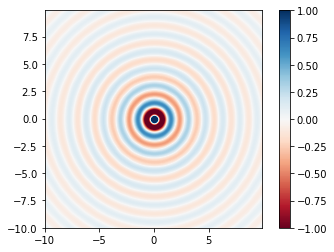

In [4]:
draw(0.0,4.0)

You can try the interactive version.

In [7]:
ipw.interact(draw, 
    t=ipw.FloatSlider(min=0.0,  max=5.0, step=0.1, value=0.0, continuous_update=False),
    k=ipw.FloatSlider(min=0.25, max=5.0, step=0.25, value=1.0, continuous_update=False)
)

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='t', max=5.0), FloatSlider(v…

<function __main__.draw(t, k=1.0)>

The final piece is work in progress... I am still trying to figure out how to animate the plot shown above to illustrate the propagation of the waves outwards. the problem is that I don't know how to animate with a time-step that is smaller than 1.

In [8]:
play = ipw.Play(
     interval=200,
    value=0,
    min=0,
    max=100,
    step=1,
    description="Press play",
    disabled=False
)
slider = ipw.IntSlider()
ipw.jslink((play, 'value'), (slider, 'value'))
ipw.interact(draw,t=slider,k=2.0)
ipw.HBox([play, slider])

interactive(children=(IntSlider(value=0, description='t'), FloatSlider(value=2.0, description='k', max=6.0, mi…